In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [4]:
from sklearn.cluster import Birch
b=Birch(n_clusters=5)  # Adjust `n_clusters` as needed
y_birch = b.fit_predict(x)
y_birch

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [5]:
supervised=df
supervised['cluster_values']=y_birch
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_values
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [6]:
supervised.to_csv("birch_clustered_data.csv", index=False)

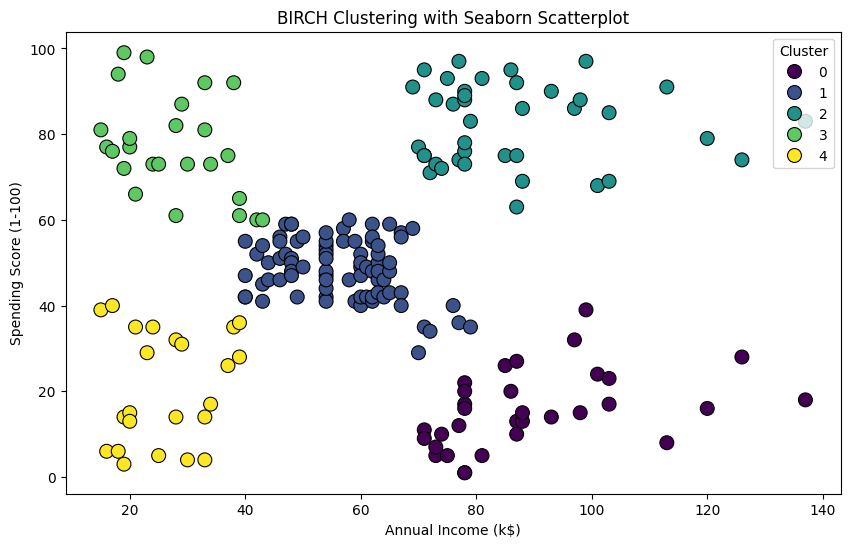

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=supervised.columns[3], 
    y=supervised.columns[4], 
    hue='cluster_values', 
    palette='viridis', 
    data=supervised, 
    s=100, edgecolor='k'
)

# Enhance plot details
plt.title('BIRCH Clustering with Seaborn Scatterplot')
plt.xlabel(supervised.columns[3])  # Dynamic x-axis label
plt.ylabel(supervised.columns[4])  # Dynamic y-axis label
plt.legend(title='Cluster', loc='upper right')
plt.show()

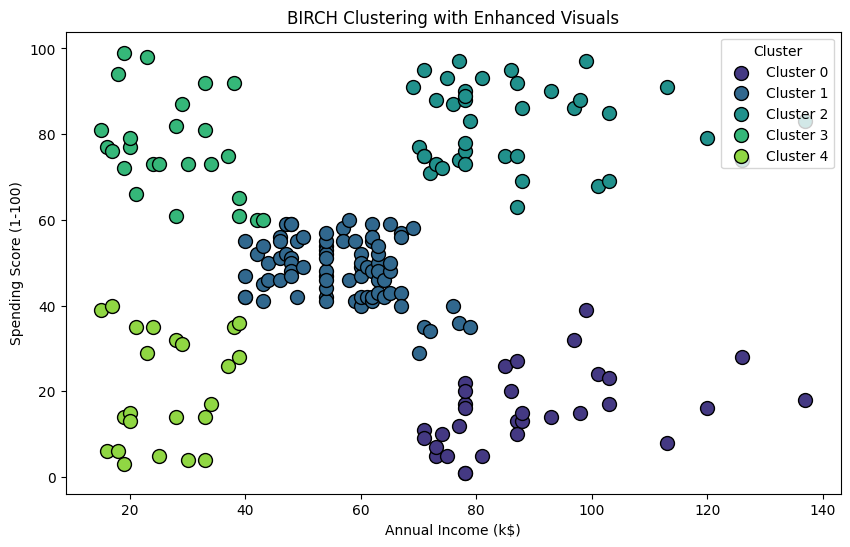

In [8]:
# Plotting the clusters with enhanced visuals
plt.figure(figsize=(10, 6))
unique_labels = np.unique(y_birch)

# Set color palette for clusters
palette = sns.color_palette("viridis", len(unique_labels))

# Plot each cluster with a unique color
for i, label in enumerate(unique_labels):
    plt.scatter(
        x[y_birch == label, 0], x[y_birch == label, 1], 
        s=100, color=palette[i], label=f'Cluster {label}', edgecolor='k'
    )

plt.title('BIRCH Clustering with Enhanced Visuals')
plt.xlabel(supervised.columns[3])  # Dynamic x-axis label
plt.ylabel(supervised.columns[4])  # Dynamic y-axis label

# Ensure legend is populated
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, title='Cluster', loc='upper right')
plt.show()